In [66]:
import matplotlib.pyplot as plt
import xarray as xar
import scipy as sc
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

/tmp/ipykernel_1818/2379681327.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [85]:
qvar_data = xar.open_dataarray('../data/qaoa_variance_nsamples1000.nc')
qvar_data_exact = xar.open_dataarray('../data/qaoa_variance_exact_p23.nc')
qvar_data_exact_256 = xar.open_dataarray('../data/qaoa_variance_exact_p23_N256.nc')
qsd_exact = np.sqrt(qvar_data_exact)/3*2/qvar_data_exact.N
qsd_exact_256 = np.sqrt(qvar_data_exact_256)/3*2/qvar_data_exact_256.N

## Plot the variance vs N

Text(0.5, 1.0, 'Sampled variance')

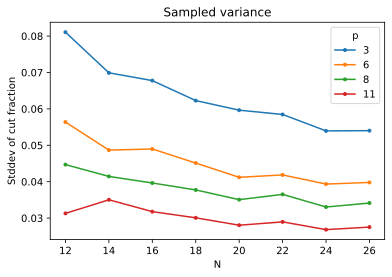

In [68]:
smp = qvar_data.std('sample').mean('graph_seed') # scales as 1/sqrt(N)
smp.plot(x='N', hue='p', marker='.')
plt.ylabel('Stddev of cut fraction')
smp = qvar_data.std('sample').mean('graph_seed') # scales as 1/sqrt(N)
plt.title("Sampled variance")

<xarray.DataArray 'N' (N: 11)>
array([18, 20, 22, 24, 26, 28, 30, 36, 40, 46, 54], dtype=int32)
Coordinates:
  * N        (N) int32 18 20 22 24 26 28 30 36 40 46 54

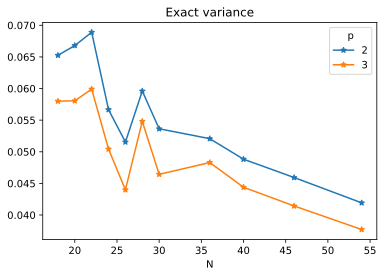

In [109]:
qsd_exact.plot(x='N', hue='p', marker='*')
plt.title("Exact variance")
qsd_exact.N

## Deterimine the variance vs N scaling coefficient

<xarray.DataArray (p: 4, nsamples: 1)>
array([[0.26981028],
       [0.19263068],
       [0.16156896],
       [0.12839445]])
Coordinates:
  * p         (p) int32 3 6 8 11
  * nsamples  (nsamples) int32 1000

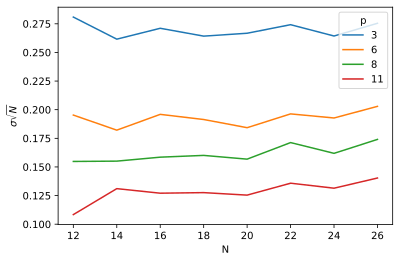

In [70]:
smp = qvar_data.std('sample').mean('graph_seed') # scales as 1/sqrt(N)
smp_norm = smp*np.sqrt(smp.N)
smp_norm.plot(x='N', hue='p') # should be close to linear
plt.ylabel('$\sigma\sqrt{N}$')
plt.title("")
coeffs = smp_norm.mean('N')
coeffs

In [71]:
qsd_coef = coeffs.sel(p=3).data
qsd_256 = qsd_coef/np.sqrt(256)
print("SD for 256-Node graph", qsd_256)
print("Variance for 256-Node graph", qsd_256**2)

SD for 256-Node graph [0.01686314]
Variance for 256-Node graph [0.00028437]


In [81]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler

def get_colors(n, cm=plt.cm.gnuplot2, offset=0.25):
    return [cm(offset + x*(1-2*offset)) for x in np.linspace(0, 1, n)]
    
colorlist = get_colors(4)
    
custom_cycler = cycler(color=colorlist)

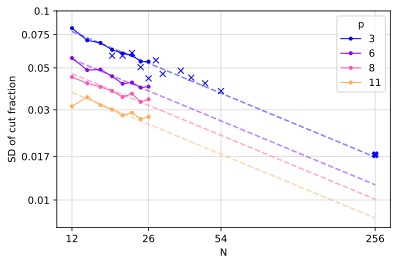

In [127]:
smp = qvar_data.std('sample').mean('graph_seed') # scales as 1/sqrt(N)
colors = get_colors(4)
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
    
ax.set_prop_cycle(custom_cycler)
smp.plot(x='N', hue='p', marker='.', linewidth=1)
plt.ylabel('SD of cut fraction')

for p in qvar_data.p:
    Ns = np.linspace(12, 256, 20)
    coef = coeffs.sel(p=p).data
    plt.plot(Ns, coef/np.sqrt(Ns), '--', alpha=.5)
    
qsd_exact.sel(p=3).plot(x='N', hue='p', marker='x', linestyle='')
var_256 =qsd_exact_256.sel(p=3).data
plt.plot([256], [var_256], marker='X', color=colors[0])
plt.xscale('log')#, base=2)
plt.yscale('log') 
    
plt.title('')
plt.grid(alpha=.5)
plt.xticks([12, 26, 54, 256], labels=[12, 26, 54, 256])
plt.yticks([0.01, 0.017, 0.03, 0.05, 0.075, 0.1], labels=[0.01, 0.017, 0.03, 0.05, 0.075, 0.1])
plt.minorticks_off()
plt.ylabel("SD of cut fraction")
plt.savefig("./pdf/sd_of_cut_fraction.pdf")

In [74]:
qvar_data.graph_seed

<xarray.DataArray 'graph_seed' (graph_seed: 20)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int32)
Coordinates:
  * graph_seed  (graph_seed) int32 0 1 2 3 4 5 6 7 8 ... 12 13 14 15 16 17 18 19

Text(0.5, 1.0, 'Standard deviation vs p')

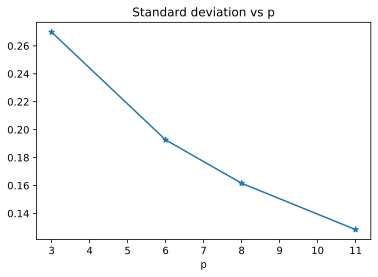

In [75]:
smp_norm.mean('N').plot(x='p', marker='*')
plt.title("Standard deviation vs p")

---